In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import xarray as xr

In [2]:
data = pd.read_csv('kelp_survey_data.csv')

In [3]:
data

,Date,dist(0),diam(0),dist(45),diam(45),dist(90),diam(90),dist(135),diam(135),dist(180),diam(180),dist(225),diam(225),dist(270),diam(270),dist(315),diam(315)
0,7/26/2022,3.5,0.954930,4.2,11.140846,9.4,2.300000,3.80,19.098593,9.6,0.38,2.8,3.501409,8.4,4.456338,5.9,6.684508
1,7/26/2022,4,1.591549,4.6,1.909859,10,2.900000,2.10,4.774648,NaN,NaN,7.5,13.369015,6.95,3.023944,6.7,3.183099
2,7/26/2022,NaN,NaN,4.7,1.273240,*10,5.900000,3.50,1.973521,NaN,NaN,7.5,4.774648,7,2.005352,6.7,1.909859
3,7/26/2022,NaN,NaN,5.3,2.387324,2.85,1.909859,9.00,4.774648,NaN,NaN,8.3,1.909859,7.65,2.928451,NaN,NaN
4,7/26/2022,NaN,NaN,7.3,3.501409,3.35,1.687042,9.20,9.549297,NaN,NaN,NaN,NaN,7.65,3.883381,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,8/30/2022,NaN,NaN,NaN,NaN,NaN,NaN,7.50,1.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,8/30/2022,NaN,NaN,NaN,NaN,NaN,NaN,8.35,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,8/30/2022,NaN,NaN,NaN,NaN,NaN,NaN,9.20,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,8/30/2022,NaN,NaN,NaN,NaN,NaN,NaN,9.30,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data

,Date,dist(0),diam(0),dist(45),diam(45),dist(90),diam(90),dist(135),diam(135),dist(180),diam(180),dist(225),diam(225),dist(270),diam(270),dist(315),diam(315)
0,2022-07-26,3.5,0.954930,4.2,11.140846,9.4,2.300000,3.80,19.098593,9.6,0.38,2.8,3.501409,8.4,4.456338,5.9,6.684508
1,2022-07-26,4,1.591549,4.6,1.909859,10,2.900000,2.10,4.774648,NaN,NaN,7.5,13.369015,6.95,3.023944,6.7,3.183099
2,2022-07-26,NaN,NaN,4.7,1.273240,*10,5.900000,3.50,1.973521,NaN,NaN,7.5,4.774648,7,2.005352,6.7,1.909859
3,2022-07-26,NaN,NaN,5.3,2.387324,2.85,1.909859,9.00,4.774648,NaN,NaN,8.3,1.909859,7.65,2.928451,NaN,NaN
4,2022-07-26,NaN,NaN,7.3,3.501409,3.35,1.687042,9.20,9.549297,NaN,NaN,NaN,NaN,7.65,3.883381,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2022-08-30,NaN,NaN,NaN,NaN,NaN,NaN,7.50,1.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,2022-08-30,NaN,NaN,NaN,NaN,NaN,NaN,8.35,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,2022-08-30,NaN,NaN,NaN,NaN,NaN,NaN,9.20,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,2022-08-30,NaN,NaN,NaN,NaN,NaN,NaN,9.30,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='Frequency'>

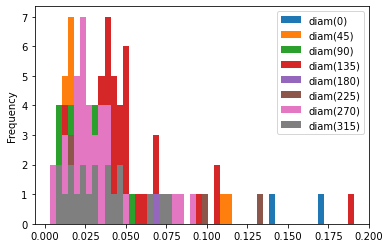

In [25]:
diam = (data.filter(like='diam'))/100
diam.plot.hist(bins=50)

In [28]:
diam_mean = np.mean(diam)
diam_mean

diam(0)      0.039194
diam(45)     0.035285
diam(90)     0.026301
diam(135)    0.043439
diam(180)    0.033677
diam(225)    0.045955
diam(270)    0.031744
diam(315)    0.034146
dtype: float64

In [29]:
# Re = vel * diam / kv
# Re_turb = 1000
# Kv at 12.75 = .0000012101
# vel_turb = 1000 * kv / diam
kv = .0000012101
Re_turb = 1000
(Re_turb * kv)/diam_mean

diam(0)      0.030875
diam(45)     0.034295
diam(90)     0.046010
diam(135)    0.027858
diam(180)    0.035933
diam(225)    0.026332
diam(270)    0.038121
diam(315)    0.035439
dtype: float64

In [11]:
def new_coordinates(bearing, distance, lat1, lon1):
    import math

    R = 6378.1 #Radius of the Earth
    bearing = math.radians(bearing)
    d = distance/1000 #Distance in km


    lat1 = math.radians(lat1) #Current lat point converted to radians
    lon1 = math.radians(lon1) #Current long point converted to radians

    lat2 = math.asin( math.sin(lat1)*math.cos(d/R) +
     math.cos(lat1)*math.sin(d/R)*math.cos(bearing))

    lon2 = lon1 + math.atan2(math.sin(bearing)*math.sin(d/R)*math.cos(lat1),
             math.cos(d/R)-math.sin(lat1)*math.sin(lat2))

    lat2 = math.degrees(lat2)
    lon2 = math.degrees(lon2)
    return lat2, lon2

In [12]:
# Original coordinates 36.56196 N, 121.94176 W
t1, t2 = new_coordinates(0, 3.5, 36.56196, -121.94176)

In [13]:
t1

36.56199144121734

In [14]:
t2

-121.94176000000002

φ2 = asin( sin φ1 ⋅ cos δ + cos φ1 ⋅ sin δ ⋅ cos θ )
λ2 = λ1 + atan2( sin θ ⋅ sin δ ⋅ cos φ1, cos δ − sin φ1 ⋅ sin φ2 )